In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("Time_Series/item1213.csv").iloc[:, 2:]
data.columns = ['M0', 'qty1', 'qty2', 'qty3']
M0, M1, M2, M3 = data['M0'], [], [], []
for i in range(len(data)-3):
    M1.append(M0[i+1])
    M2.append(M0[i+2])
    M3.append(M0[i+3])
data = data.drop(['M0'], axis=1).iloc[:44, :]
data['M0'], data['M1'], data['M2'], data['M3'] = M0, M1, M2, M3
M_1, M_2, M_3 = [], [], []
for i in range(3, len(data)):
    M_1.append(M0[i-1])
    M_2.append(M0[i-2])
    M_3.append(M0[i-3])
data = data.iloc[3:]
data['M_1'], data['M_2'], data['M_3'] = M_1, M_2, M_3

In [3]:
data.head()

,qty1,qty2,qty3,M0,M1,M2,M3,M_1,M_2,M_3
3,0.1174,0.0000,0.0,0.1627,0.2037,0.0764,0.1301,0.5205,0.1980,0.2447
4,0.1132,0.0000,0.0,0.2037,0.0764,0.1301,0.0707,0.1627,0.5205,0.1980
5,0.0481,0.0000,0.0,0.0764,0.1301,0.0707,0.2122,0.2037,0.1627,0.5205
6,0.1047,0.0000,0.0,0.1301,0.0707,0.2122,0.0764,0.0764,0.2037,0.1627
7,0.0679,0.0085,0.0,0.0707,0.2122,0.0764,0.8048,0.1301,0.0764,0.2037


In [4]:
X = data[['qty1', 'qty2', 'qty3', 'M_1', 'M_2', 'M_3']]
y = data[['M0', 'M1', 'M2', 'M3']]
X = MinMaxScaler().fit_transform(X)

In [5]:
X_train = []
y_train = []
for i in range(10, len(data)-6):
    X_train.append(X[i-10:i, :])
    y_train.append(y.values[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(25, 10, 6) (25, 4)


In [6]:
X_test = []
y_test = []
for i in range(len(data)-6,len(data)):
    X_test.append(X[i-10:i])
    y_test.append(y.values[i,:])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(6, 10, 6) (6, 4)


In [7]:
y_test

array([[0.4979, 0.0806, 0.1386, 0.3607],
       [0.0806, 0.1386, 0.3607, 0.2405],
       [0.1386, 0.3607, 0.2405, 0.4851],
       [0.3607, 0.2405, 0.4851, 0.0948],
       [0.2405, 0.4851, 0.0948, 0.174 ],
       [0.4851, 0.0948, 0.174 , 0.1174]])

In [8]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

Num GPUs Available:  0


IndexError: list index out of range

In [198]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=30, input_shape = (10,6)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=4)
])

model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_15 (SimpleRNN)    (None, 30)                1110      
_________________________________________________________________
dropout_11 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 124       
Total params: 1,234
Trainable params: 1,234
Non-trainable params: 0
_________________________________________________________________


In [199]:
history = model.fit(X_train, y_train, epochs=200)

Train on 25 samples
Epoch 1/200
25/25 [==============================] - 0s 16ms/sample - loss: 0.2370
Epoch 2/200
25/25 [==============================] - 0s 239us/sample - loss: 0.2127
Epoch 3/200
25/25 [==============================] - 0s 239us/sample - loss: 0.1743
Epoch 4/200
25/25 [==============================] - 0s 319us/sample - loss: 0.2235
Epoch 5/200
25/25 [==============================] - 0s 399us/sample - loss: 0.1920
Epoch 6/200
25/25 [==============================] - 0s 279us/sample - loss: 0.1980
Epoch 7/200
25/25 [==============================] - 0s 279us/sample - loss: 0.2016
Epoch 8/200
25/25 [==============================] - 0s 239us/sample - loss: 0.1883
Epoch 9/200
25/25 [==============================] - 0s 239us/sample - loss: 0.1523
Epoch 10/200
25/25 [==============================] - 0s 279us/sample - loss: 0.1681
Epoch 11/200
25/25 [==============================] - 0s 239us/sample - loss: 0.1888
Epoch 12/200
25/25 [==============================] - 0

Epoch 98/200
25/25 [==============================] - 0s 199us/sample - loss: 0.0878
Epoch 99/200
25/25 [==============================] - 0s 239us/sample - loss: 0.0668
Epoch 100/200
25/25 [==============================] - 0s 359us/sample - loss: 0.0855
Epoch 101/200
25/25 [==============================] - 0s 319us/sample - loss: 0.0868
Epoch 102/200
25/25 [==============================] - 0s 558us/sample - loss: 0.0969
Epoch 103/200
25/25 [==============================] - 0s 200us/sample - loss: 0.0830
Epoch 104/200
25/25 [==============================] - 0s 239us/sample - loss: 0.0822
Epoch 105/200
25/25 [==============================] - 0s 200us/sample - loss: 0.0796
Epoch 106/200
25/25 [==============================] - 0s 200us/sample - loss: 0.0876
Epoch 107/200
25/25 [==============================] - 0s 201us/sample - loss: 0.0774
Epoch 108/200
25/25 [==============================] - 0s 199us/sample - loss: 0.0797
Epoch 109/200
25/25 [==============================] - 0

Epoch 194/200
25/25 [==============================] - 0s 199us/sample - loss: 0.0639
Epoch 195/200
25/25 [==============================] - 0s 239us/sample - loss: 0.0554
Epoch 196/200
25/25 [==============================] - 0s 279us/sample - loss: 0.0687
Epoch 197/200
25/25 [==============================] - 0s 199us/sample - loss: 0.0615
Epoch 198/200
25/25 [==============================] - 0s 239us/sample - loss: 0.0536
Epoch 199/200
25/25 [==============================] - 0s 279us/sample - loss: 0.0562
Epoch 200/200
25/25 [==============================] - 0s 199us/sample - loss: 0.0582


6/6 [==============================] - 0s 13ms/sample - loss: 0.0410


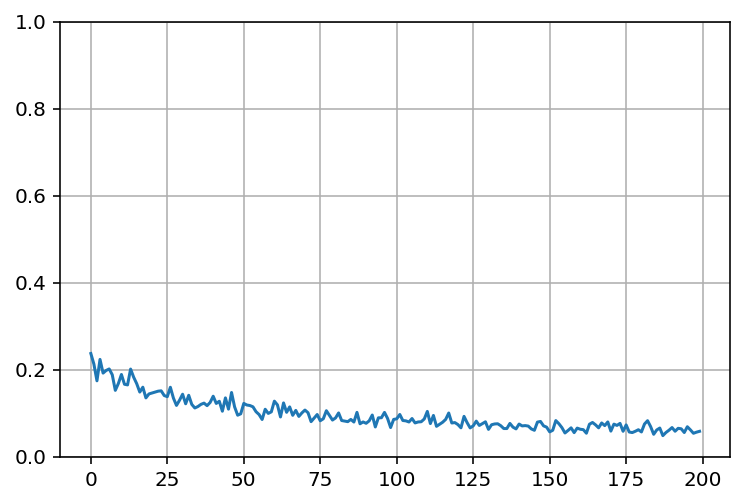

0.041046470403671265


In [200]:
mse_test = model.evaluate(X_test, y_test)
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
print(mse_test)

In [214]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [190]:
acc= []
for i in range(0,4):
    for index, value in enumerate(y_pred[i]): 
      acc.append(min(y_test[i][index], y_pred[i][index])/max(y_test[i][index], y_pred[i][index]))
i=i+1
acc=np.array(acc)
acc.reshape(4,4)

array([[0.76789224, 0.19618035, 0.57362832, 0.79086084],
       [0.19674626, 0.94687741, 0.57732704, 0.44092682],
       [0.64406683, 0.46895793, 0.99484471, 0.12082222],
       [0.89594878, 0.60118643, 0.57281962, 0.18977565]])

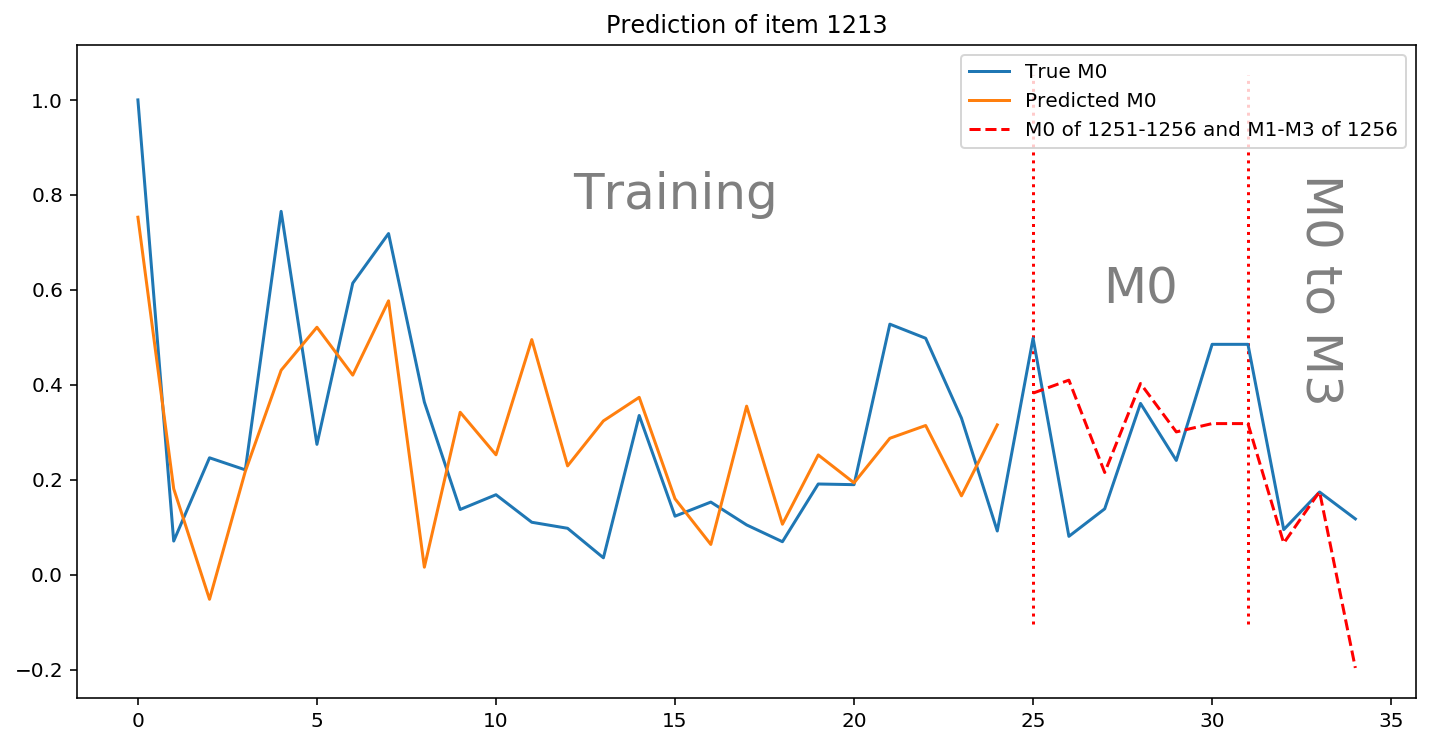

In [278]:
plt.figure(figsize=(12, 6))
plt.plot(np.append(y_train[:, 0], np.append(y_test[:, 0], y_test[-1, 0:])), label='True M0')
plt.plot(y_pred_train[:, 0], '-', label='Predicted M0')
ax = plt.gca()
ymin, ymax = ax.get_ylim()
plt.vlines(len(y_train), ymin, ymax, linestyles="dotted", color='r')
plt.vlines(len(y)-10, ymin, ymax, linestyles="dotted", color='r')
plt.plot(list(range(25, 35)), np.append(y_pred_test[:, 0], y_pred_test[-1]) , '--', color='r', label='M0 of 1251-1256 and M1-M3 of 1256')
plt.legend()
plt.title("Prediction of item 1213")
plt.text(15, 0.8, 'Training', ha='center', va='center', size=25, alpha=0.5)
plt.text(28, 0.6, 'M0', ha='center', va='center', size=25, alpha=0.5)
plt.text(33, 0.6, 'M0 to M3', ha='center', rotation=-90, va='center', size=25, alpha=0.5)
plt.show()